<a href="https://colab.research.google.com/github/syedhussain07/Smokingskills/blob/main/Data_Prepossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/startup_funding.csv')

# Data Cleaning
# Handling missing values for both numerical and categorical data
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Replace missing values with median for numerical columns and 'Unknown' for categorical columns
data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.median()))
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna('Unknown'))

# Optionally remove variables that you have decided are not needed
# Uncomment the following lines and list the columns you want to remove
# columns_to_remove = ['column_name_1', 'column_name_2', 'column_name_3']  # replace with actual column names
# data = data.drop(columns=columns_to_remove)

# Save the cleaned dataset to a CSV file
cleaned_file_path = 'Startup_Funding_Cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"The cleaned dataset has been saved as {cleaned_file_path}")


The cleaned dataset has been saved as Startup_Funding_Cleaned.csv


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
data = pd.read_csv('/content/Startup_Funding_Cleaned.csv')

# Convert 'Amount in USD' to numeric and handle missing values
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'].str.replace(',', ''), errors='coerce')
data['Amount in USD'].fillna(data['Amount in USD'].median(), inplace=True)

# Standardize the numerical data
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(data[numerical_cols])

# Apply PCA
pca = PCA(n_components=0.95)
numerical_data_reduced = pca.fit_transform(numerical_data_scaled)

# Create a DataFrame for the reduced numerical data
reduced_numerical_data_df = pd.DataFrame(numerical_data_reduced, columns=[f'PCA_{i}' for i in range(numerical_data_reduced.shape[1])])

# Combine the PCA components with all original columns
final_reduced_data_df = pd.concat([data, reduced_numerical_data_df], axis=1)

# Save the final reduced data to a CSV file
final_reduced_data_df.to_csv('/content/startup_funding_reduction_with_amount.csv', index=False)
print(final_reduced_data_df)
# Replace 'path_to_your_file' with the actual path to your files.


      Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler product

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
data = pd.read_csv('/content/Startup_Funding_Cleaned (1).csv')

# Check if 'Amount in USD' needs handling for missing values
if data['Amount in USD'].isnull().any():
    # Handling missing values in 'Amount in USD', for example, filling with the median
    data['Amount in USD'].fillna(data['Amount in USD'].median(), inplace=True)

# Selecting numerical columns for PCA
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_cols]

# Standardizing the numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA(n_components=0.95)
numerical_data_reduced = pca.fit_transform(numerical_data_scaled)

# Creating a DataFrame for the reduced numerical data
reduced_data_df = pd.DataFrame(numerical_data_reduced)

# Concatenating the reduced numerical data with the original categorical data
categorical_data = data.select_dtypes(include=['object'])
final_reduced_data_df = pd.concat([categorical_data.reset_index(drop=True), reduced_data_df], axis=1)

# Saving the reduced data to a CSV file
final_reduced_data_df.to_csv('/content/startup_funding_reduction.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
data = pd.read_csv('/content/startup_funding_reduction_with_amount.csv')

# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Create the column transformer with both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Fit and transform the data
data_transformed = preprocessor.fit_transform(data)

# Get the column names for the one-hot encoded categorical columns
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the column names for numerical and one-hot encoded categorical columns
all_feature_names = list(numerical_cols) + list(ohe_feature_names)

# Create the transformed DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=all_feature_names)

# Save the transformed data to a CSV file
data_transformed_df.to_csv('startup_funding_transformed.csv', index=False)

print("Transformed dataset has been saved to 'startup_funding_transformed.csv'.")


ValueError: ignored

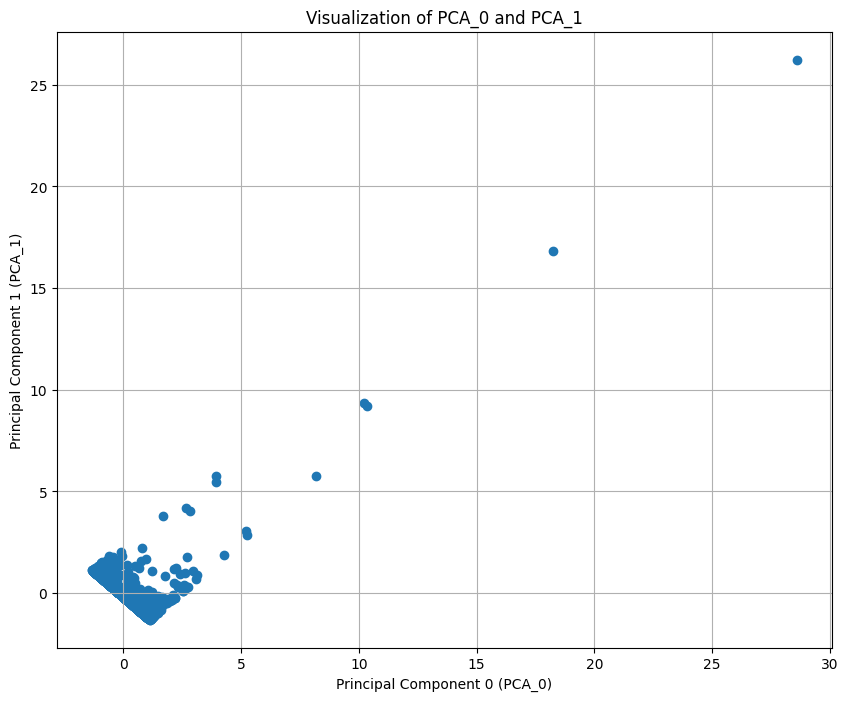

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset after PCA reduction
df_pca = pd.read_csv('/content/startup_funding_reduction_with_amount.csv')

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PCA_0'], df_pca['PCA_1'])
plt.title('Visualization of PCA_0 and PCA_1')
plt.xlabel('Principal Component 0 (PCA_0)')
plt.ylabel('Principal Component 1 (PCA_1)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/startup_funding_reduction.csv')

# Convert 'Amount in USD' to numeric, if it's not already

# Replace NaNs in 'Amount in USD' with the median or mean, depending on your previous choice
# Select only the numeric columns for standardization
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize only the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save the standardized dataset to a CSV file
df.to_csv('/content/startup_funding_standardized.csv', index=False)

print("Standardized dataset saved as 'startup_funding_standardized.csv'")


Standardized dataset saved as 'startup_funding_standardized.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/startup_funding_reduction_with_amount.csv')

# Select only the numeric columns for standardization (excluding date columns or other non-numeric types)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize only the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save the standardized dataset to a CSV file
df.to_csv('/content/startup_funding_standardized.csv', index=False)

print("Standardized dataset saved as 'startup_funding_standardized.csv'")


Standardized dataset saved as 'startup_funding_standardized.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the reduced dataset
data_reduced = pd.read_csv('/content/startup_funding_reduction_with_amount.csv')

# Ensuring 'Amount in USD' is numeric
data_reduced['Amount in USD'].fillna(data_reduced['Amount in USD'].median(), inplace=True)

# Normalizing 'Amount in USD'
scaler = StandardScaler()
data_transformed = data_reduced.copy()
data_transformed['Amount in USD Normalized'] = scaler.fit_transform(data_transformed[['Amount in USD']])

# Discretizing 'Amount in USD'
bin_edges = [
    data_transformed['Amount in USD'].min(),
    data_transformed['Amount in USD'].quantile(0.33),
    data_transformed['Amount in USD'].quantile(0.66),
    data_transformed['Amount in USD'].max()
]
bin_labels = ['Low', 'Medium', 'High']

data_transformed['Amount in USD Binned'] = pd.cut(
    data_transformed['Amount in USD'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True
)

# Save the final processed data to a CSV file
data_transformed.to_csv('/content/startup_funding_final_processed_file.csv', index=False)

print("Final processed data saved as 'startup_funding_final_processed_file.csv'")


Final processed data saved as 'startup_funding_final_processed_file.csv'


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/startup_funding_final_processed_file.csv')

# Drop the 'Remarks' column if it exists
if 'Remarks' in data.columns:
    data.drop(columns=['Remarks'], inplace=True)

# Save the modified dataset with the same name
data.to_csv('/content/startup_funding_final_processed_file.csv', index=False)

print("The dataset has been updated and saved with the 'Remarks' column removed.")


The dataset has been updated and saved with the 'Remarks' column removed.
